In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# The dataset is in CSV format
data = pd.read_csv(r"C:\Users\MANAMI DAS\OneDrive\Desktop\cmi\Project\ML\loanapproval\LoanApprovalPrediction.csv")


In [125]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [127]:
data=data.drop(["Loan_ID"],axis=1)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data[['LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(data[['LoanAmount','Loan_Amount_Term','Credit_History']])


In [128]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
458,Male,Yes,0.0,Graduate,No,4333,2451.0,110.000000,360.0,1.000000,Urban,N
143,Female,Yes,2.0,Graduate,No,14866,0.0,70.000000,360.0,1.000000,Urban,Y
264,Female,No,0.0,Graduate,No,3237,0.0,30.000000,360.0,1.000000,Urban,Y
571,Male,Yes,1.0,Graduate,No,4283,3000.0,172.000000,84.0,1.000000,Rural,N
520,Male,No,1.0,Graduate,No,11250,0.0,196.000000,360.0,0.843352,Semiurban,N
552,Male,Yes,0.0,Not Graduate,No,4467,0.0,120.000000,360.0,0.843352,Rural,Y
48,Female,No,0.0,Graduate,No,4000,2275.0,144.000000,360.0,1.000000,Semiurban,Y
231,Female,No,0.0,Graduate,Yes,3463,0.0,122.000000,360.0,0.843352,Urban,Y
94,Male,No,0.0,Graduate,Yes,6782,0.0,144.968804,360.0,0.843352,Urban,N
538,Male,Yes,1.0,Not Graduate,No,2492,2375.0,144.968804,360.0,1.000000,Rural,Y


In [129]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,81.236564,64.436899,0.348551
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,128.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,163.500000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [130]:
# Check which columns in the DataFrame 'data' have the data type 'object' (usually refers to categorical variables)
obj = (data.dtypes == 'object')

# Print the number of categorical columns in the DataFrame
print("Categorical variables:", len(list(obj[obj].index)))



Categorical variables: 6


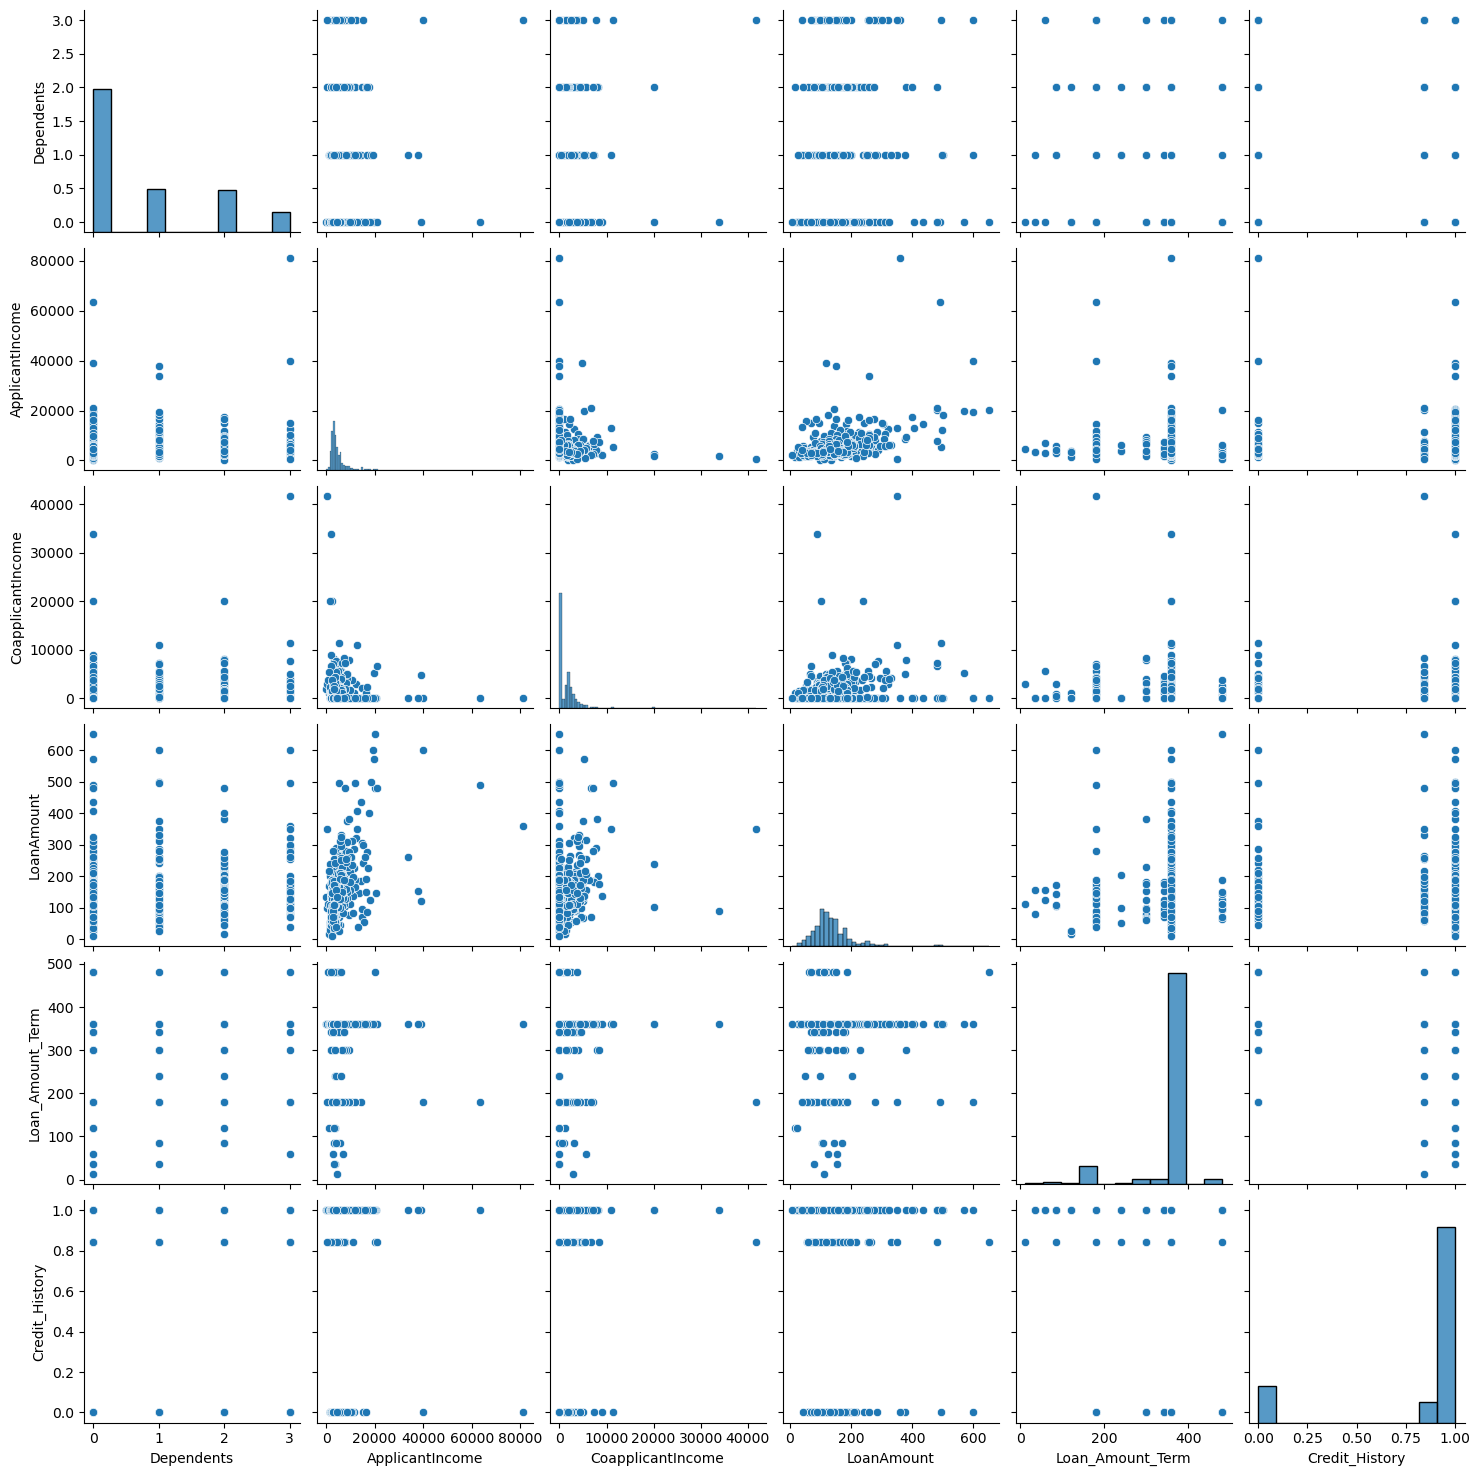

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for each feature vs target
sns.pairplot(data)  # Pairplot works for multivariate datasets
plt.show()


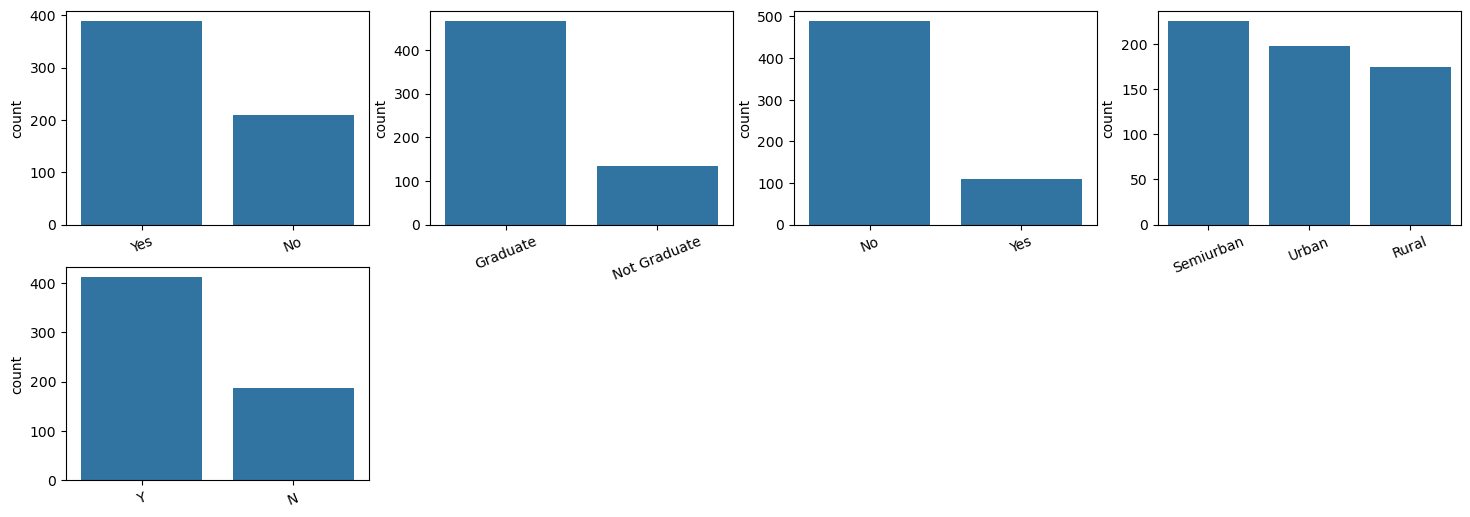

In [132]:
# Identify categorical columns (those with data type 'object')
obj = (data.dtypes == 'object')

# Get the list of columns that have categorical data type 'object'
object_cols = list(obj[obj].index)

# Set up the figure size for the plots
plt.figure(figsize=(18,36))

# Initialize the subplot index to place the plots
index = 1

# Loop through each categorical column and generate bar plots for their value counts
for col in object_cols[1:]:
    # Get the value counts (frequency of each category) for the current categorical column
    y = data[col].value_counts()
    
    # Create a subplot for each categorical column and set its position
    plt.subplot(11,4,index)
    
    # Rotate the x-axis labels by 90 degrees to avoid overlapping text
    plt.xticks(rotation=22)
    
    # Create a barplot with the categories on the x-axis and their frequency on the y-axis
    sns.barplot(x=list(y.index), y=y)
    
    # Increment the index to place the next plot in the next subplot
    index += 1
    
plt.show()

In [133]:
object_cols
label_col=["Loan_Status"]
nominal_col=['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area']

In [134]:
# Import label encoder from sklearn
from sklearn import preprocessing
  
# Create a label_encoder object which can convert categorical data to numeric labels
label_encoder = preprocessing.LabelEncoder()

# Create a Boolean mask to identify categorical columns
obj = (data.dtypes == 'object')

# Loop through each column that is identified as a categorical column (i.e., those with dtype 'object')
for col in list(obj[obj].index):
    # Apply label encoding to the categorical column
    data[col] = label_encoder.fit_transform(data[col])

In [135]:
# Again check the object datatype columns. Let’s find out if there is still any left.
# Create a Boolean mask to identify columns with datatype 'object'
obj = (data.dtypes == 'object')

# Count the number of columns with datatype 'object' (categorical columns)
print("Categorical variables:", len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

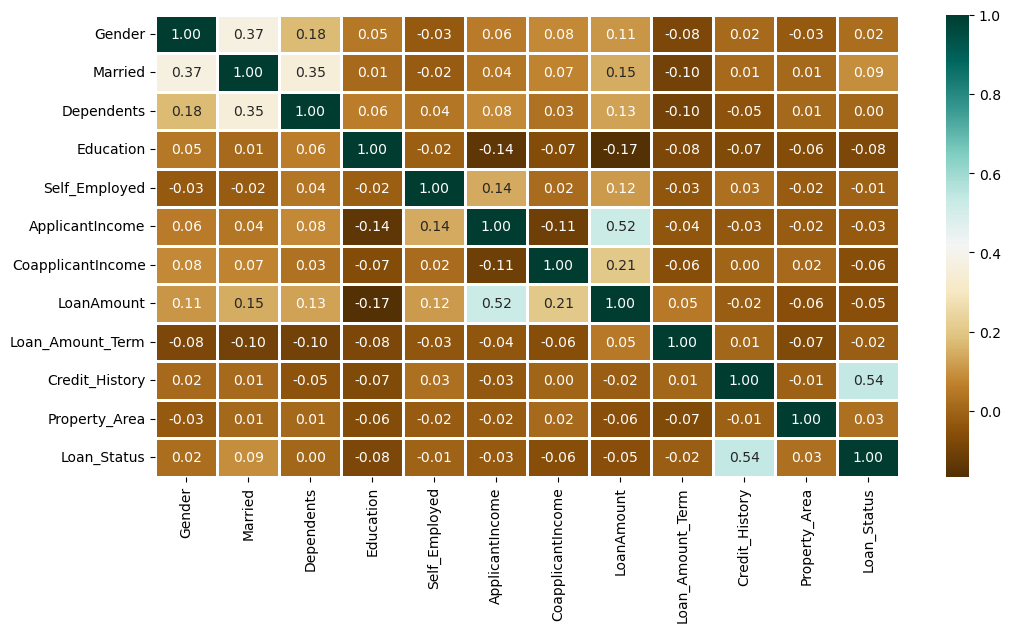

In [136]:
# Set up the figure size for the heatmap (12 inches wide, 6 inches tall)
plt.figure(figsize=(12,6))

# Create a heatmap to visualize the correlation matrix of the dataset
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f',
            linewidths=2, annot=True)


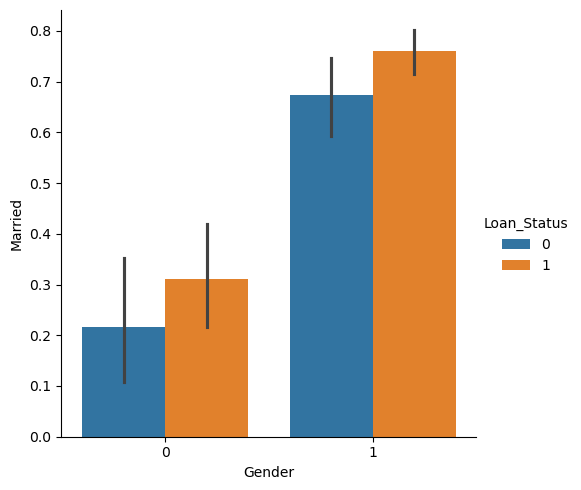

In [137]:
# Importing Seaborn for data visualization
import seaborn as sns

# Create a categorical plot (bar plot) to visualize the relationship between gender and marital status with respect to loan status
sns.catplot(
    # 'Gender' will be plotted along the x-axis
    x="Gender",  
    # 'Married' will be plotted along the y-axis
    y="Married",  
    # Different hues (colors) represent the 'Loan_Status' variable (e.g., Approved, Rejected)
    hue="Loan_Status",  
    # We want a bar plot, as it's suited for comparing categorical data
    kind="bar",  
    # The data to be used in the plot (here, 'data' is the DataFrame containing the variables)
    data=data
)


### For model

In [146]:
data = pd.read_csv(r"C:\Users\MANAMI DAS\OneDrive\Desktop\cmi\Project\ML\loanapproval\LoanApprovalPrediction.csv")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer2= SimpleImputer(strategy='most_frequent')
data[['LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(data[['LoanAmount','Loan_Amount_Term','Credit_History']])
data[["Dependents"]]=imputer2.fit_transform(data[["Dependents"]])

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [147]:

# Importing train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Separating the features (X) and the target variable (Y)
# Drop the 'Loan_Status' column from the dataset to get the features (X)
X = data.drop(['Loan_Status',"Loan_ID"], axis=1)

# 'Loan_Status' column is our target variable (Y)
Y = data['Loan_Status']

# Print the shape of X (features) and Y (target) to check the dimensions
# X.shape: Number of samples and features (n_samples, n_features)
# Y.shape: Number of samples (n_samples,)
print(X.shape, Y.shape)

# Split the data into training and testing sets
# 60% of the data will be used for training and 40% for testing
# test_size=0.4: 40% for testing, random_state=1 ensures the split is reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Print the shape of training and testing sets
# X_train and Y_train will be used for training the model
# X_test and Y_test will be used for testing the model
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


(598, 11) (598,)


((478, 11), (120, 11), (478,), (120,))

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area'])
],remainder='passthrough')
X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)

# Import label encoder from sklearn
from sklearn import preprocessing
  
# Create a label_encoder object which can convert categorical data to numeric labels for the output
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(Y_train)
Y_train=label_encoder.transform(Y_train)
Y_test=label_encoder.transform(Y_test)

In [149]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Initialize models
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=500)  # Increased max_iter to avoid convergence warning

# Initialize scaler
scaler = StandardScaler()

# Scale the data: fit the scaler on the training data, and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Making predictions on the training set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, Y_train)  # Train on the scaled data
    Y_pred = clf.predict(X_train_scaled)  # Predict on the scaled training data
    print(f"Accuracy score of {clf.__class__.__name__} = {100*metrics.accuracy_score(Y_train, Y_pred):.6f}%")


Accuracy score of RandomForestClassifier = 97.280335%
Accuracy score of KNeighborsClassifier = 83.682008%
Accuracy score of SVC = 81.589958%
Accuracy score of LogisticRegression = 78.870293%


In [151]:

# Making predictions on the testing set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, Y_train)  # Train the classifier on the scaled training data
    Y_pred = clf.predict(X_test_scaled)  # Make predictions on the scaled test data
    print(f"Accuracy score of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_test, Y_pred):.6f}%")


Accuracy score of RandomForestClassifier = 80.833333%
Accuracy score of KNeighborsClassifier = 80.000000%
Accuracy score of SVC = 83.333333%
Accuracy score of LogisticRegression = 85.833333%
